#### Instalações e Importações

In [218]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")


#### Importando a Base

In [219]:
df = pd.read_csv("PEDE_PASSOS_DATASET_FIAP.csv", sep=";", encoding="Utf-8", thousands='.', decimal=',')     
df.head(2)

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883.752,NaN,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5625.0,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7916665.0,50.0,Fase 2 (5º e 6º ano)


#### Conhecendo a Base

In [220]:
#tamanho da base
print(df.shape)

(1349, 69)


In [221]:
# tipos dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   INSTITUICAO_ENSINO_ALUNO_2020  728 non-null    object 
 1   NOME                           1349 non-null   object 
 2   IDADE_ALUNO_2020               728 non-null    object 
 3   ANOS_PM_2020                   728 non-null    object 
 4   FASE_TURMA_2020                728 non-null    object 
 5   PONTO_VIRADA_2020              702 non-null    object 
 6   INDE_2020                      728 non-null    object 
 7   INDE_CONCEITO_2020             727 non-null    object 
 8   PEDRA_2020                     728 non-null    object 
 9   DESTAQUE_IEG_2020              728 non-null    object 
 10  DESTAQUE_IDA_2020              728 non-null    object 
 11  DESTAQUE_IPV_2020              703 non-null    object 
 12  IAA_2020                       728 non-null    o

In [222]:
# verificando valores NaN
print(df.isna().sum())

INSTITUICAO_ENSINO_ALUNO_2020    621
NOME                               0
IDADE_ALUNO_2020                 621
ANOS_PM_2020                     621
FASE_TURMA_2020                  621
                                ... 
INDICADO_BOLSA_2022              487
PONTO_VIRADA_2022                487
IPV_2022                         487
IAN_2022                         487
NIVEL_IDEAL_2022                 487
Length: 69, dtype: int64


In [223]:
# Verificando valores duplicados
print(df.duplicated().sum())

0


In [224]:
# Verificando valores nulos
df.isnull().sum()

INSTITUICAO_ENSINO_ALUNO_2020    621
NOME                               0
IDADE_ALUNO_2020                 621
ANOS_PM_2020                     621
FASE_TURMA_2020                  621
                                ... 
INDICADO_BOLSA_2022              487
PONTO_VIRADA_2022                487
IPV_2022                         487
IAN_2022                         487
NIVEL_IDEAL_2022                 487
Length: 69, dtype: int64

In [225]:
# Verificando valores nulos em cada linha 
df.isnull().any(axis=1)

0        True
1        True
2        True
3        True
4        True
        ...  
1344     True
1345     True
1346     True
1347    False
1348     True
Length: 1349, dtype: bool

In [226]:
# Substituindo valores nulos por 0
df = df.fillna(0)

In [227]:
# Verificando se ainda temos valores nulos em cada linha 
df.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
1344    False
1345    False
1346    False
1347    False
1348    False
Length: 1349, dtype: bool

In [228]:
print(df.columns)

Index(['INSTITUICAO_ENSINO_ALUNO_2020', 'NOME', 'IDADE_ALUNO_2020',
       'ANOS_PM_2020', 'FASE_TURMA_2020', 'PONTO_VIRADA_2020', 'INDE_2020',
       'INDE_CONCEITO_2020', 'PEDRA_2020', 'DESTAQUE_IEG_2020',
       'DESTAQUE_IDA_2020', 'DESTAQUE_IPV_2020', 'IAA_2020', 'IEG_2020',
       'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020', 'FASE_2021',
       'TURMA_2021', 'INSTITUICAO_ENSINO_ALUNO_2021',
       'SINALIZADOR_INGRESSANTE_2021', 'PEDRA_2021', 'INDE_2021', 'IAA_2021',
       'IEG_2021', 'IPS_2021', 'IDA_2021', 'IPP_2021', 'REC_EQUIPE_1_2021',
       'REC_EQUIPE_2_2021', 'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021',
       'PONTO_VIRADA_2021', 'IPV_2021', 'IAN_2021', 'NIVEL_IDEAL_2021',
       'DEFASAGEM_2021', 'FASE_2022', 'TURMA_2022', 'ANO_INGRESSO_2022',
       'BOLSISTA_2022', 'INDE_2022', 'CG_2022', 'CF_2022', 'CT_2022',
       'PEDRA_2022', 'DESTAQUE_IEG_2022', 'DESTAQUE_IDA_2022',
       'DESTAQUE_IPV_2022', 'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022',
       

### Tratamentos Iniciais da Base

##### Verificando e substituindo os valores incorretos

In [229]:
# Exemplo de valores "INCORRETOS" na coluna IDADE_ALUNO_2020
df.loc[df["IDADE_ALUNO_2020"] == "D108"] # Alguns valores estão incorretos como os da linha abaixo

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
1258,V202,ALUNO-1259,D108,D971,D207,D9600,D980,D9891/2,D9891/2A,D301,...,0.0,0,0,0,0,0,0,0.0,0.0,0


In [230]:
# Criando uma função para verificar se um valor é incorreto. Exemplo(V202 e D108)
def verificar(valor):
    return isinstance(valor, str) and re.match(r'^[A-Za-z]\d+', valor)

# Identificando os índices das linhas que contêm valores incorretos em qualquer coluna
indices_para_remover = df.applymap(verificar).any(axis=1)

# Removendo as linhas identificadas
df = df[~indices_para_remover]

In [231]:
# Verificando se ainda temos valores incorretos em qualquer coluna
df.applymap(verificar).any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
1344    False
1345    False
1346    False
1347    False
1348    False
Length: 1348, dtype: bool

##### Selecionando as colunas que serão trabalhadas (para reduzir a dimensionalidade)

In [232]:
print(df.columns)

Index(['INSTITUICAO_ENSINO_ALUNO_2020', 'NOME', 'IDADE_ALUNO_2020',
       'ANOS_PM_2020', 'FASE_TURMA_2020', 'PONTO_VIRADA_2020', 'INDE_2020',
       'INDE_CONCEITO_2020', 'PEDRA_2020', 'DESTAQUE_IEG_2020',
       'DESTAQUE_IDA_2020', 'DESTAQUE_IPV_2020', 'IAA_2020', 'IEG_2020',
       'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020', 'FASE_2021',
       'TURMA_2021', 'INSTITUICAO_ENSINO_ALUNO_2021',
       'SINALIZADOR_INGRESSANTE_2021', 'PEDRA_2021', 'INDE_2021', 'IAA_2021',
       'IEG_2021', 'IPS_2021', 'IDA_2021', 'IPP_2021', 'REC_EQUIPE_1_2021',
       'REC_EQUIPE_2_2021', 'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021',
       'PONTO_VIRADA_2021', 'IPV_2021', 'IAN_2021', 'NIVEL_IDEAL_2021',
       'DEFASAGEM_2021', 'FASE_2022', 'TURMA_2022', 'ANO_INGRESSO_2022',
       'BOLSISTA_2022', 'INDE_2022', 'CG_2022', 'CF_2022', 'CT_2022',
       'PEDRA_2022', 'DESTAQUE_IEG_2022', 'DESTAQUE_IDA_2022',
       'DESTAQUE_IPV_2022', 'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022',
       

In [233]:
# Separando as colunas que serão utilizadas para a análise
df_selecionadas = df[['NOME',
       'ANOS_PM_2020','FASE_TURMA_2020', 'INDE_2020','PEDRA_2020', 
       'IAA_2020', 'IEG_2020','IPS_2020', 'IDA_2020',
       'IPP_2020', 'IPV_2020', 'IAN_2020', 
       'FASE_2021', 'INDE_2021', 'PEDRA_2021',
       'IAA_2021','IEG_2021', 'IPS_2021', 'IDA_2021',
       'IPP_2021', 'IPV_2021', 'IAN_2021', 
       'NIVEL_IDEAL_2021',
       'FASE_2022','INDE_2022','PEDRA_2022', 
       'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022',
       'IPP_2022', 'IPV_2022', 'IAN_2022',
       'NIVEL_IDEAL_2022'
]]

##### Alterado as colunas Objetc para Float

In [234]:
df_selecionadas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1348 entries, 0 to 1348
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NOME              1348 non-null   object 
 1   ANOS_PM_2020      1348 non-null   object 
 2   FASE_TURMA_2020   1348 non-null   object 
 3   INDE_2020         1348 non-null   object 
 4   PEDRA_2020        1348 non-null   object 
 5   IAA_2020          1348 non-null   object 
 6   IEG_2020          1348 non-null   object 
 7   IPS_2020          1348 non-null   object 
 8   IDA_2020          1348 non-null   object 
 9   IPP_2020          1348 non-null   object 
 10  IPV_2020          1348 non-null   object 
 11  IAN_2020          1348 non-null   object 
 12  FASE_2021         1348 non-null   float64
 13  INDE_2021         1348 non-null   object 
 14  PEDRA_2021        1348 non-null   object 
 15  IAA_2021          1348 non-null   float64
 16  IEG_2021          1348 non-null   float64
 17  

In [235]:
# Extrai apenas a parte numérica de cada entrada na coluna "FASE_TURMA_2020"
df_selecionadas["FASE_TURMA_2020"] = df_selecionadas["FASE_TURMA_2020"].astype(str).str.extract('(\d+)')

# Converte a coluna de volta para numérico.
df_selecionadas["FASE_TURMA_2020"] = pd.to_numeric(df_selecionadas["FASE_TURMA_2020"]).astype("float")

In [236]:
df_selecionadas.select_dtypes(include='float64').columns

Index(['FASE_TURMA_2020', 'FASE_2021', 'IAA_2021', 'IEG_2021', 'IPS_2021',
       'IDA_2021', 'IPP_2021', 'IPV_2021', 'IAN_2021', 'FASE_2022',
       'INDE_2022', 'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022', 'IPP_2022',
       'IPV_2022', 'IAN_2022'],
      dtype='object')

In [237]:
df_selecionadas.select_dtypes(include='object').columns

Index(['NOME', 'ANOS_PM_2020', 'INDE_2020', 'PEDRA_2020', 'IAA_2020',
       'IEG_2020', 'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020',
       'INDE_2021', 'PEDRA_2021', 'NIVEL_IDEAL_2021', 'PEDRA_2022',
       'NIVEL_IDEAL_2022'],
      dtype='object')

In [238]:
#Transformar em float as colunas que são object
colunas_transf_float= df_selecionadas[
    ['ANOS_PM_2020', 'INDE_2020', 'IAA_2020','IEG_2020', 'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020',
     'INDE_2021', 'INDE_2022', 'IAA_2022', 'IEG_2022', 'IDA_2022', 'IPP_2022',
     'IPV_2022']]

In [239]:

for coluna in colunas_transf_float:
    # Verifica se a coluna é do tipo objeto, o que geralmente indica uma string no pandas
    if df_selecionadas[coluna].dtype == 'object':
        df_selecionadas[coluna] = df_selecionadas[coluna].str.replace(".","").astype(float, errors='ignore')
    else:
        # Se a coluna já for numérica, apenas converte para float sem usar o acessor .str
        df_selecionadas[coluna] = df_selecionadas[coluna].astype(float, errors='ignore')

In [240]:
df_selecionadas["INDE_2021"]

0       7319
1        NaN
2       7021
3        NaN
4       7399
        ... 
1344    6606
1345     NaN
1346     NaN
1347    7422
1348     NaN
Name: INDE_2021, Length: 1348, dtype: object

In [241]:
df_selecionadas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1348 entries, 0 to 1348
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NOME              1348 non-null   object 
 1   ANOS_PM_2020      727 non-null    float64
 2   FASE_TURMA_2020   1348 non-null   float64
 3   INDE_2020         727 non-null    float64
 4   PEDRA_2020        1348 non-null   object 
 5   IAA_2020          727 non-null    float64
 6   IEG_2020          727 non-null    float64
 7   IPS_2020          727 non-null    float64
 8   IDA_2020          727 non-null    float64
 9   IPP_2020          727 non-null    float64
 10  IPV_2020          727 non-null    float64
 11  IAN_2020          727 non-null    float64
 12  FASE_2021         1348 non-null   float64
 13  INDE_2021         686 non-null    object 
 14  PEDRA_2021        1348 non-null   object 
 15  IAA_2021          1348 non-null   float64
 16  IEG_2021          1348 non-null   float64
 17  

In [242]:
df_selecionadas["INDE_2021"] = pd.to_numeric(df_selecionadas["INDE_2021"], errors='coerce')

In [243]:
# Verificando se todas as colunas numericas foram transformadas em float
df_selecionadas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1348 entries, 0 to 1348
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NOME              1348 non-null   object 
 1   ANOS_PM_2020      727 non-null    float64
 2   FASE_TURMA_2020   1348 non-null   float64
 3   INDE_2020         727 non-null    float64
 4   PEDRA_2020        1348 non-null   object 
 5   IAA_2020          727 non-null    float64
 6   IEG_2020          727 non-null    float64
 7   IPS_2020          727 non-null    float64
 8   IDA_2020          727 non-null    float64
 9   IPP_2020          727 non-null    float64
 10  IPV_2020          727 non-null    float64
 11  IAN_2020          727 non-null    float64
 12  FASE_2021         1348 non-null   float64
 13  INDE_2021         684 non-null    float64
 14  PEDRA_2021        1348 non-null   object 
 15  IAA_2021          1348 non-null   float64
 16  IEG_2021          1348 non-null   float64
 17  

In [244]:
# Converter para string e pegar os primeiros três caracteres
#df_selecionadas[["INDE_2020", "INDE_2021", "INDE_2022"]] = df_selecionadas[["INDE_2020", "INDE_2021", "INDE_2022"]].astype(str).applymap(lambda x: x[:2])


In [245]:
df_selecionadas[['INDE_2020','IAA_2020', 'IEG_2020','IPS_2020', 'IDA_2020',
       'IPP_2020', 'IPV_2020', 'IAN_2020', 'INDE_2021','IAA_2021','IEG_2021', 
       'IPS_2021', 'IDA_2021','IPP_2021', 'IPV_2021', 'IAN_2021', 'INDE_2022', 
       'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022','IPP_2022', 'IPV_2022', 
       'IAN_2022',      
]] = df_selecionadas[['INDE_2020','IAA_2020', 'IEG_2020','IPS_2020', 'IDA_2020',
       'IPP_2020', 'IPV_2020', 'IAN_2020', 'INDE_2021','IAA_2021','IEG_2021', 
       'IPS_2021', 'IDA_2021','IPP_2021', 'IPV_2021', 'IAN_2021', 'INDE_2022', 
       'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022','IPP_2022', 'IPV_2022', 
       'IAN_2022',      
]].astype(str).applymap(lambda x: x[:2])

In [246]:
df_selecionadas[['INDE_2020','IAA_2020', 'IEG_2020','IPS_2020', 'IDA_2020',
       'IPP_2020', 'IPV_2020', 'IAN_2020', 'INDE_2021','IAA_2021','IEG_2021', 
       'IPS_2021', 'IDA_2021','IPP_2021', 'IPV_2021', 'IAN_2021', 'INDE_2022', 
       'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022','IPP_2022', 'IPV_2022', 
       'IAN_2022',      
]] = df_selecionadas[['INDE_2020','IAA_2020', 'IEG_2020','IPS_2020', 'IDA_2020',
       'IPP_2020', 'IPV_2020', 'IAN_2020', 'INDE_2021','IAA_2021','IEG_2021', 
       'IPS_2021', 'IDA_2021','IPP_2021', 'IPV_2021', 'IAN_2021', 'INDE_2022', 
       'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022','IPP_2022', 'IPV_2022', 
       'IAN_2022',      
]].replace('na', np.nan)


In [247]:
df_selecionadas[['INDE_2020','IAA_2020', 'IEG_2020','IPS_2020', 'IDA_2020',
       'IPP_2020', 'IPV_2020', 'IAN_2020', 'INDE_2021','IAA_2021','IEG_2021', 
       'IPS_2021', 'IDA_2021','IPP_2021', 'IPV_2021', 'IAN_2021', 'INDE_2022', 
       'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022','IPP_2022', 'IPV_2022', 
       'IAN_2022',      
]] = df_selecionadas[['INDE_2020','IAA_2020', 'IEG_2020','IPS_2020', 'IDA_2020',
       'IPP_2020', 'IPV_2020', 'IAN_2020', 'INDE_2021','IAA_2021','IEG_2021', 
       'IPS_2021', 'IDA_2021','IPP_2021', 'IPV_2021', 'IAN_2021', 'INDE_2022', 
       'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022','IPP_2022', 'IPV_2022', 
       'IAN_2022',      
]].astype(float)

In [248]:
df_selecionadas[['INDE_2020','IAA_2020', 'IEG_2020','IPS_2020', 'IDA_2020',
       'IPP_2020', 'IPV_2020', 'IAN_2020', 'INDE_2021','IAA_2021','IEG_2021', 
       'IPS_2021', 'IDA_2021','IPP_2021', 'IPV_2021', 'IAN_2021', 'INDE_2022', 
       'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022','IPP_2022', 'IPV_2022', 
       'IAN_2022',      
]] = df_selecionadas[['INDE_2020','IAA_2020', 'IEG_2020','IPS_2020', 'IDA_2020',
       'IPP_2020', 'IPV_2020', 'IAN_2020', 'INDE_2021','IAA_2021','IEG_2021', 
       'IPS_2021', 'IDA_2021','IPP_2021', 'IPV_2021', 'IAN_2021', 'INDE_2022', 
       'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022','IPP_2022', 'IPV_2022', 
       'IAN_2022',      
]]/10

In [249]:
#df_selecionadas[["INDE_2020", "INDE_2021", "INDE_2022"]] = df_selecionadas[["INDE_2020", "INDE_2021", "INDE_2022"]].replace('na', np.nan)
#df_selecionadas[["INDE_2020", "INDE_2021", "INDE_2022"]] = df_selecionadas[["INDE_2020", "INDE_2021", "INDE_2022"]].astype(float)

In [250]:
df_selecionadas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1348 entries, 0 to 1348
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NOME              1348 non-null   object 
 1   ANOS_PM_2020      727 non-null    float64
 2   FASE_TURMA_2020   1348 non-null   float64
 3   INDE_2020         727 non-null    float64
 4   PEDRA_2020        1348 non-null   object 
 5   IAA_2020          727 non-null    float64
 6   IEG_2020          727 non-null    float64
 7   IPS_2020          727 non-null    float64
 8   IDA_2020          727 non-null    float64
 9   IPP_2020          727 non-null    float64
 10  IPV_2020          727 non-null    float64
 11  IAN_2020          727 non-null    float64
 12  FASE_2021         1348 non-null   float64
 13  INDE_2021         684 non-null    float64
 14  PEDRA_2021        1348 non-null   object 
 15  IAA_2021          1348 non-null   float64
 16  IEG_2021          1348 non-null   float64
 17  

In [251]:
df_INDES = df_selecionadas[["INDE_2020", "INDE_2021", "INDE_2022"]]
df_INDES

,INDE_2020,INDE_2021,INDE_2022
0,7.8,7.3,0.0
1,NaN,NaN,7.6
2,7.8,7.0,0.0
3,5.0,NaN,7.1
4,8.0,7.3,7.2
...,...,...,...
1344,NaN,6.6,0.0
1345,NaN,NaN,8.1
1346,7.1,NaN,0.0
1347,7.8,7.4,6.7


#### Renomeando coluna

In [252]:
df_selecionadas.rename(columns={"FASE_TURMA_2020": "FASE_2020"}, inplace=True)

### Gráficos Iniciais

#### Boxplot

In [253]:

df_INDES = df_INDES[~df_INDES[["INDE_2020", "INDE_2021", "INDE_2022"]].isin([0, '#Nulo'])]  # Remove valores nulos e 0

# Unpivot the DataFrame para que possamos usar plotly.express
df_melted = df_INDES.melt(value_vars=["INDE_2020", "INDE_2021", "INDE_2022"], var_name="Ano", value_name="INDE")

# Construir o boxplot com plotly.express
fig = px.box(df_melted, x="Ano", y="INDE", title="Distribuição das notas INDE 2020, 2021 e 2022")

# Ajustar o layout para melhorar a visualização
fig.update_layout(
    yaxis=dict(title="Nota INDE"),
    xaxis=dict(title="Ano"),font=dict(size=14, color='black', family='Arial'),
    width=800, 
    height=600,
    template='plotly_white'
)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))

# Mostrar o gráfico
fig.show()

#### Histograma

In [254]:
df_INDES = df_INDES[~df_INDES[["INDE_2020", "INDE_2021", "INDE_2022"]].isin([0, '#Nulo'])]  # Remove valores nulos e 0

# Unpivot the DataFrame para que possamos usar plotly.express
df_melted = df_INDES.melt(value_vars=["INDE_2020", "INDE_2021", "INDE_2022"], var_name="Ano", value_name="INDE")

# Construir o histograma com plotly.express
fig = px.histogram(df_melted, x="INDE", color="Ano", barmode="overlay", nbins=20, 
                   title="Distribuição das notas INDE 2020, 2021 e 2022",
                   labels={"INDE": "Nota INDE", "Ano": "Ano"})

# Ajustar o layout para melhorar a visualização
fig.update_layout(
    yaxis=dict(range=[0, 180], title="Contagem"),
    xaxis=dict(title="Nota INDE"),font=dict(size=14, color='black', family='Arial'),
    legend_title_text='Ano',
    width=1200, 
    height=800,
    template='plotly_white'
)

# Melhorar a paleta de cores

fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))

# Mostrar o gráfico
fig.show()

In [255]:
# Notas máximas
df_selecionadas[['INDE_2020', 'INDE_2021', 'INDE_2022']].max()

INDE_2020    9.7
INDE_2021    9.2
INDE_2022    9.4
dtype: float64

In [256]:
# Transformar os dados para formato longo
df_long = df_selecionadas[["PEDRA_2020", "PEDRA_2021", "PEDRA_2022"]].melt(var_name='Ano', value_name='Nota')

# Criar a figura
fig = px.histogram(df_long, x='Nota', color='Ano', barmode='group', title="Distribuição das notas PEDRA 2020, 2021 e 2022")

# Configurações do layout
fig.update_layout(plot_bgcolor='white', font=dict(size=14, color='black', family='Arial'))
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))

# Mostrar o gráfico
fig.show()

In [257]:

# Transformar os dados para formato longo
df_long = df_selecionadas[["PEDRA_2020", "PEDRA_2021", "PEDRA_2022"]].melt(var_name='Ano', value_name='Nota')

# Filtrar os dados para excluir 0 e #Nulo
df_long = df_long[~df_long['Nota'].isin([0, '#NULO!'])]

# Criar a figura com Plotly Express
fig = px.histogram(df_long, x='Nota', color='Ano', barmode='group', title="Distribuição das PEDRAS 2020, 2021 e 2022")

fig.update_layout(plot_bgcolor='white', font=dict(size=14, color='black', family='Arial'))
#fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))

# Mostrar o gráfico
fig.show()

#### Correlação

In [258]:
# Colunas que serão utilizadas para a análise de correlação
df_correlacao=df_selecionadas[[
    'ANOS_PM_2020', 'FASE_2020', 'INDE_2020', 
    'IAA_2020', 'IEG_2020', 'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 
    'IAN_2020', 'FASE_2021', 'INDE_2021', 'IAA_2021', 'IEG_2021', 'IPS_2021', 
    'IDA_2021', 'IPP_2021', 'IPV_2021', 'IAN_2021', 'FASE_2022', 'INDE_2022', 
    'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022', 'IPP_2022', 'IPV_2022', 
    'IAN_2022']]


In [259]:
# Calcular a matriz de correlação
df_correlacao = df_correlacao.corr()

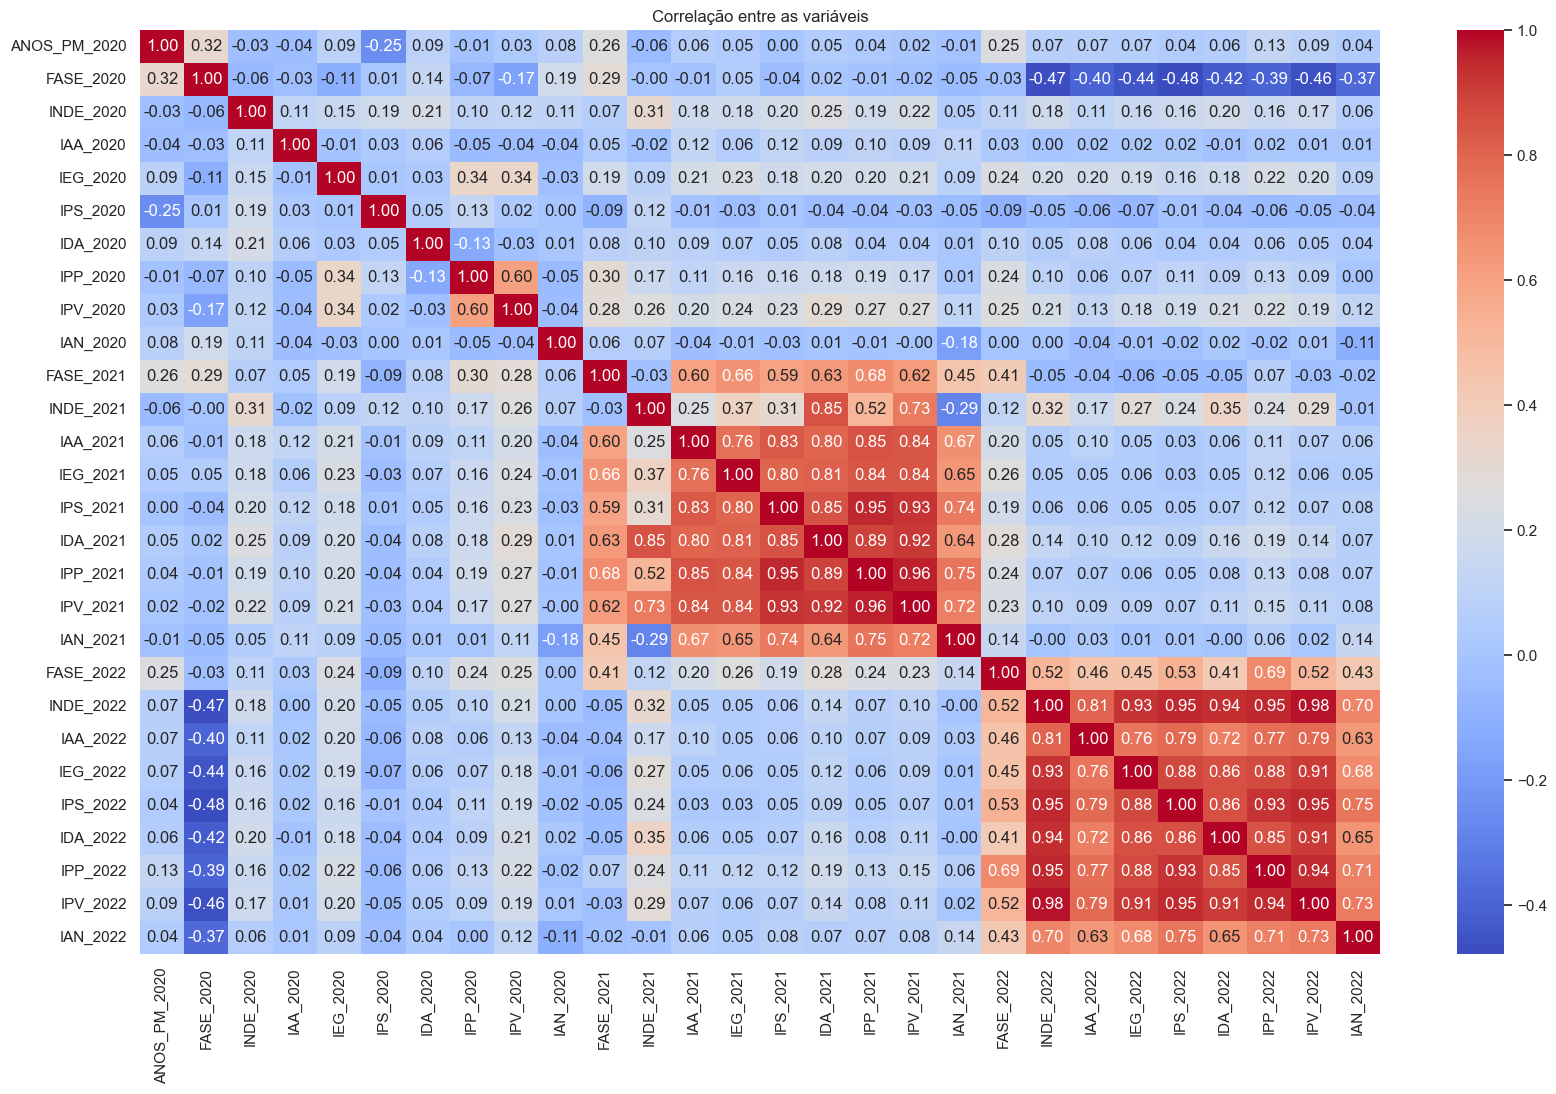

In [260]:
# Plotando Gráfico de correlação
plt.figure(figsize=(20, 12))
sns.heatmap(df_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlação entre as variáveis")
plt.show()

#### Indicadores dos 10 Melhores Alunos

In [261]:
# Filtrando os 20 melhores alunos, conforme nota INDE.
df_melhores = df_selecionadas[["NOME", "INDE_2020","INDE_2021","INDE_2022"]].sort_values(by="INDE_2022", ascending=False).head(10)
df_melhores

,NOME,INDE_2020,INDE_2021,INDE_2022
74,ALUNO-75,9.6,9.1,9.4
915,ALUNO-916,8.5,8.8,9.3
152,ALUNO-153,8.1,8.3,9.1
929,ALUNO-930,8.3,8.3,8.9
1094,ALUNO-1095,9.1,9.2,8.9
406,ALUNO-407,8.2,8.4,8.9
403,ALUNO-404,8.3,8.4,8.9
1333,ALUNO-1334,NaN,8.8,8.9
806,ALUNO-807,8.0,9.1,8.8
663,ALUNO-664,9.2,8.6,8.8


In [262]:

# Transformar o DataFrame para o formato longo (long format) necessário para plotly express
df_long = pd.melt(df_melhores, id_vars=['NOME'], value_vars=['INDE_2020', 'INDE_2021', 'INDE_2022'],
                  var_name='Ano', value_name='Indicador')

# Criar o gráfico de barras agrupadas
fig = px.bar(df_long, x='NOME', y='Indicador', color='Ano', barmode='group',
             title='Indicadores dos 10 Melhores Alunos',
             labels={'NOME': 'Nome', 'Indicador': 'Indicadores'})

# Ajustar o layout para melhorar a visualização
fig.update_layout(xaxis_tickangle=-45, width=800, height=600, font=dict(size=14, color='black', family='Arial'),plot_bgcolor='white')

#fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))

# Mostrar o gráfico
fig.show()

#### Médias INDEs(todosos anos) por Aluno

In [263]:
# Calcular a média dos indicadores
df_selecionadas['Média_INDE'] = df_selecionadas.apply(lambda x: (x["INDE_2020"] + x["INDE_2021"] + x["INDE_2022"]) / 3, axis=1)

# Ordenar o DataFrame com base na média calculada em ordem decrescente
df_selecionadas = df_selecionadas.sort_values(by='Média_INDE', ascending=False)

# Exibir o DataFrame ordenado
df_selecionadas.head(10)

,NOME,ANOS_PM_2020,FASE_2020,INDE_2020,PEDRA_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,...,PEDRA_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,IPP_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022,Média_INDE
74,ALUNO-75,1.0,3.0,9.6,Topázio,0.1,1.0,1.0,0.9,9.3,...,Topázio,1.0,9.6,9.3,8.5,9.2,9.7,1.0,Fase 3 (7º e 8º ano),9.366667
1094,ALUNO-1095,1.0,0.0,9.1,Topázio,0.1,1.0,7.5,1.0,7.5,...,Topázio,1.0,9.6,7.5,9.9,6.2,8.0,1.0,Fase 1 (4º ano),9.066667
10,ALUNO-11,0.0,0.0,9.7,Topázio,9.0,1.0,8.1,1.0,1.0,...,Topázio,8.0,9.1,7.5,9.8,7.0,9.5,5.0,Fase 2 (5º e 6º ano),9.000000
915,ALUNO-916,3.0,3.0,8.5,Topázio,7.9,8.7,7.5,0.7,8.5,...,Topázio,8.7,1.0,9.3,8.5,9.0,9.6,1.0,Fase 5 (1º EM),8.866667
1129,ALUNO-1130,1.0,2.0,8.7,Topázio,9.5,9.7,6.8,0.9,8.3,...,Topázio,9.1,9.9,6.2,9.1,8.2,8.2,1.0,Fase 3 (7º e 8º ano),8.866667
663,ALUNO-664,1.0,4.0,9.2,Topázio,9.5,1.0,1.0,9.3,9.1,...,Topázio,1.0,9.4,9.3,8.0,9.0,1.0,5.0,Fase 7 (3º EM),8.866667
1170,ALUNO-1171,1.0,3.0,8.9,Topázio,9.5,9.5,6.2,8.3,8.7,...,Topázio,8.3,9.8,5.6,7.9,7.8,9.5,1.0,Fase 3 (7º e 8º ano),8.833333
745,ALUNO-746,2.0,2.0,8.8,Topázio,9.0,9.1,7.5,0.9,8.5,...,Topázio,7.5,9.3,6.2,7.7,8.5,9.2,1.0,Fase 3 (7º e 8º ano),8.800000
374,ALUNO-375,4.0,2.0,9.3,Topázio,9.0,9.5,7.5,9.5,9.6,...,Topázio,9.1,8.8,5.6,6.6,8.5,8.5,1.0,Fase 3 (7º e 8º ano),8.733333
1291,ALUNO-1292,1.0,2.0,8.9,Topázio,0.1,9.4,7.5,0.9,8.7,...,Topázio,1.0,9.3,8.7,7.1,8.5,8.5,1.0,Fase 3 (7º e 8º ano),8.733333


In [264]:
# Calcular a média dos indicadores
df_selecionadas['Média_INDE'] = df_selecionadas.apply(lambda x: (x["INDE_2020"] + x["INDE_2021"] + x["INDE_2022"]) / 3, axis=1)

# Ordenar o DataFrame com base na média calculada em ordem decrescente
df_selecionadas = df_selecionadas.sort_values(by='Média_INDE', ascending=False)

# Selecionar as 10 primeiras linhas do DataFrame ordenado
top_10 = df_selecionadas.head(10)

# Construir o gráfico de barras com Plotly Express
fig = px.bar(top_10, x='NOME', y='Média_INDE', title='Top 10 Médias INDE', labels={'NOME': 'Nome', 'Média_INDE': 'Média INDE'}, color='NOME')

# Ajustar o layout para melhorar a visualização
fig.update_layout(xaxis_tickangle=-45, width=800, height=600, font=dict(size=14, color='black', family='Arial'),plot_bgcolor='white')

#fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
# Mostrar o gráfico
fig.show()

#### Função para o cálculo do INDE 

In [265]:
# Função para calcular o INDE com base nas notas e critérios de cada fase
def calcular_INDE_fases_2020(row):
    if row["FASE_2020"] <= 7:
        INDE = (row["IAN_2020"] * 0.1 + row["IDA_2020"] * 0.2 + row["IEG_2020"] * 0.2 +
                row["IAA_2020"] * 0.1 + row["IPS_2020"] * 0.1 + row["IPP_2020"] * 0.1 + row["IPV_2020"] * 0.2)
    else:
        INDE = (row["IAN_2020"] * 0.1 + row["IDA_2020"] * 0.4 + row["IEG_2020"] * 0.2 +
                row["IAA_2020"] * 0.1 + row["IPS_2020"] * 0.2)
    return INDE

def calcular_INDE_fases_2021(row):
    if row["FASE_2021"] <= 7:
        INDE = (row["IAN_2021"] * 0.1 + row["IDA_2021"] * 0.2 + row["IEG_2021"] * 0.2 +
                row["IAA_2021"] * 0.1 + row["IPS_2021"] * 0.1 + row["IPP_2021"] * 0.1 + row["IPV_2021"] * 0.2)
    else:
        INDE = (row["IAN_2021"] * 0.1 + row["IDA_2021"] * 0.4 + row["IEG_2021"] * 0.2 +
                row["IAA_2021"] * 0.1 + row["IPS_2021"] * 0.2)
    return INDE

def calcular_INDE_fases_2022(row):
    if row["FASE_2022"] <= 7:
        INDE = (row["IAN_2022"] * 0.1 + row["IDA_2022"] * 0.2 + row["IEG_2022"] * 0.2 +
                row["IAA_2022"] * 0.1 + row["IPS_2022"] * 0.1 + row["IPP_2022"] * 0.1 + row["IPV_2022"] * 0.2)
    else:
        INDE = (row["IAN_2022"] * 0.1 + row["IDA_2022"] * 0.4 + row["IEG_2022"] * 0.2 +
                row["IAA_2022"] * 0.1 + row["IPS_2022"] * 0.2)
    return INDE

df_selecionadas['INDE_2020Novo'] = df_selecionadas.apply(calcular_INDE_fases_2020, axis=1)
df_selecionadas['INDE_2021Novo'] = df_selecionadas.apply(calcular_INDE_fases_2021, axis=1)
df_selecionadas['INDE_2022Novo'] = df_selecionadas.apply(calcular_INDE_fases_2022, axis=1)

print(f"O valor de INDE para 2020 é: {df_selecionadas['INDE_2020Novo']}")
print(f"O valor de INDE para 2021 é: {df_selecionadas['INDE_2021Novo']}")
print(f"O valor de INDE para 2022 é: {df_selecionadas['INDE_2022Novo']}")

O valor de INDE para 2020 é: 74      3.46
1094    3.61
10      2.51
915     6.33
1129    6.24
        ... 
1341     NaN
1344     NaN
1345     NaN
1346    6.22
1348     NaN
Name: INDE_2020Novo, Length: 1348, dtype: float64
O valor de INDE para 2021 é: 74      6.94
1094    7.22
10      5.98
915     7.49
1129    6.10
        ... 
1341    0.00
1344    6.61
1345    0.00
1346    0.00
1348    0.00
Name: INDE_2021Novo, Length: 1348, dtype: float64
O valor de INDE para 2022 é: 74      7.38
1094    7.58
10      8.54
915     6.43
1129    7.87
        ... 
1341    7.39
1344    0.00
1345    8.11
1346    0.00
1348    6.09
Name: INDE_2022Novo, Length: 1348, dtype: float64


In [266]:
df_selecionadas.head()

,NOME,ANOS_PM_2020,FASE_2020,INDE_2020,PEDRA_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,...,IPS_2022,IDA_2022,IPP_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022,Média_INDE,INDE_2020Novo,INDE_2021Novo,INDE_2022Novo
74,ALUNO-75,1.0,3.0,9.6,Topázio,0.1,1.0,1.0,0.9,9.3,...,9.3,8.5,9.2,9.7,1.0,Fase 3 (7º e 8º ano),9.366667,3.46,6.94,7.38
1094,ALUNO-1095,1.0,0.0,9.1,Topázio,0.1,1.0,7.5,1.0,7.5,...,7.5,9.9,6.2,8.0,1.0,Fase 1 (4º ano),9.066667,3.61,7.22,7.58
10,ALUNO-11,0.0,0.0,9.7,Topázio,9.0,1.0,8.1,1.0,1.0,...,7.5,9.8,7.0,9.5,5.0,Fase 2 (5º e 6º ano),9.000000,2.51,5.98,8.54
915,ALUNO-916,3.0,3.0,8.5,Topázio,7.9,8.7,7.5,0.7,8.5,...,9.3,8.5,9.0,9.6,1.0,Fase 5 (1º EM),8.866667,6.33,7.49,6.43
1129,ALUNO-1130,1.0,2.0,8.7,Topázio,9.5,9.7,6.8,0.9,8.3,...,6.2,9.1,8.2,8.2,1.0,Fase 3 (7º e 8º ano),8.866667,6.24,6.10,7.87


In [267]:
df_selecionadas[["FASE_2020","INDE_2020","INDE_2021","INDE_2022","IAN_2020","IDA_2020","IEG_2020","IAA_2020","IPS_2020","IPP_2020","IPV_2020","INDE_2020Novo","INDE_2021Novo","INDE_2022Novo"]]

,FASE_2020,INDE_2020,INDE_2021,INDE_2022,IAN_2020,IDA_2020,IEG_2020,IAA_2020,IPS_2020,IPP_2020,IPV_2020,INDE_2020Novo,INDE_2021Novo,INDE_2022Novo
74,3.0,9.6,9.1,9.4,1.0,0.9,1.0,0.1,1.0,9.3,9.7,3.46,6.94,7.38
1094,0.0,9.1,9.2,8.9,1.0,1.0,1.0,0.1,7.5,7.5,8.0,3.61,7.22,7.58
10,0.0,9.7,8.9,8.4,1.0,1.0,1.0,9.0,8.1,1.0,1.0,2.51,5.98,8.54
915,3.0,8.5,8.8,9.3,1.0,0.7,8.7,7.9,7.5,8.5,9.8,6.33,7.49,6.43
1129,2.0,8.7,9.1,8.8,1.0,0.9,9.7,9.5,6.8,8.3,7.8,6.24,6.10,7.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,0.0,NaN,NaN,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,7.39
1344,0.0,NaN,6.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.61,0.00
1345,0.0,NaN,NaN,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,8.11
1346,7.0,7.1,NaN,0.0,1.0,4.6,8.1,9.1,6.8,7.3,6.3,6.22,0.00,0.00


In [268]:
df_selecionadas[["INDE_2020","INDE_2021","INDE_2022","IAN_2021","IDA_2021","IEG_2021","IAA_2021","IPS_2021","IPP_2021","IPV_2021","INDE_2020Novo","INDE_2021Novo","INDE_2022Novo"]]

,INDE_2020,INDE_2021,INDE_2022,IAN_2021,IDA_2021,IEG_2021,IAA_2021,IPS_2021,IPP_2021,IPV_2021,INDE_2020Novo,INDE_2021Novo,INDE_2022Novo
74,9.6,9.1,9.4,1.0,8.5,9.2,1.0,7.5,8.8,9.7,3.46,6.94,7.38
1094,9.1,9.2,8.9,1.0,8.9,9.2,1.0,8.1,9.2,9.7,3.61,7.22,7.58
10,9.7,8.9,8.4,1.0,8.8,1.0,9.0,6.3,7.7,9.7,2.51,5.98,8.54
915,8.5,8.8,9.3,1.0,7.8,9.7,8.3,7.5,9.2,9.3,6.33,7.49,6.43
1129,8.7,9.1,8.8,5.0,9.5,1.0,1.0,7.5,9.8,9.9,6.24,6.10,7.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,NaN,NaN,8.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.00,7.39
1344,NaN,6.6,0.0,5.0,4.9,6.7,9.0,7.5,7.2,7.1,NaN,6.61,0.00
1345,NaN,NaN,8.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.00,8.11
1346,7.1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.22,0.00,0.00


In [269]:
df_selecionadas.loc[df_selecionadas["FASE_2020"] == 8, ["INDE_2020", "INDE_2021", "INDE_2022", "IAN_2020", "IDA_2020", "IEG_2020", "IAA_2020", "IPS_2020", "IPP_2020", "IPV_2020", "INDE_2020Novo", "INDE_2021Novo", "INDE_2022Novo"]].head(10)

,INDE_2020,INDE_2021,INDE_2022,IAN_2020,IDA_2020,IEG_2020,IAA_2020,IPS_2020,IPP_2020,IPV_2020,INDE_2020Novo,INDE_2021Novo,INDE_2022Novo
160,8.8,NaN,0.0,1.0,0.9,1.0,7.9,7.5,0.0,0.0,2.95,0.0,0.0
215,5.9,NaN,0.0,1.0,7.4,0.0,8.7,5.6,0.0,0.0,5.05,0.0,0.0
298,8.3,NaN,0.0,1.0,9.2,1.0,5.8,5.6,0.0,0.0,5.68,0.0,0.0
299,6.7,NaN,0.0,1.0,8.4,0.0,9.1,7.5,0.0,0.0,5.87,0.0,0.0
340,9.0,NaN,0.0,1.0,9.2,1.0,9.1,7.5,0.0,0.0,6.39,0.0,0.0
367,8.6,NaN,0.0,1.0,8.3,1.0,8.7,7.5,0.0,0.0,5.99,0.0,0.0
379,0.5,NaN,0.0,1.0,8.8,0.0,0.0,4.3,0.0,0.0,4.48,0.0,0.0
381,8.8,NaN,0.0,1.0,9.1,1.0,8.3,6.8,0.0,0.0,6.13,0.0,0.0
483,5.7,NaN,0.0,1.0,7.8,0.0,9.5,3.1,0.0,0.0,4.79,0.0,0.0
494,8.6,NaN,0.0,1.0,8.4,1.0,7.9,7.5,0.0,0.0,5.95,0.0,0.0


In [270]:
INDES_todos = df_selecionadas[["INDE_2020","INDE_2021", "INDE_2022", "INDE_2020Novo", "INDE_2021Novo", "INDE_2022Novo"]]
INDES_todos

,INDE_2020,INDE_2021,INDE_2022,INDE_2020Novo,INDE_2021Novo,INDE_2022Novo
74,9.6,9.1,9.4,3.46,6.94,7.38
1094,9.1,9.2,8.9,3.61,7.22,7.58
10,9.7,8.9,8.4,2.51,5.98,8.54
915,8.5,8.8,9.3,6.33,7.49,6.43
1129,8.7,9.1,8.8,6.24,6.10,7.87
...,...,...,...,...,...,...
1341,NaN,NaN,8.1,NaN,0.00,7.39
1344,NaN,6.6,0.0,NaN,6.61,0.00
1345,NaN,NaN,8.1,NaN,0.00,8.11
1346,7.1,NaN,0.0,6.22,0.00,0.00


In [271]:
aluno_75 = df_selecionadas.query("NOME == 'ALUNO-75'")
colunas_2020 = [col for col in df_selecionadas.columns if '2020' in col]
colunas_2020.append('NOME')
aluno_75_2020 = aluno_75[colunas_2020]
aluno_75_2020

,ANOS_PM_2020,FASE_2020,INDE_2020,PEDRA_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,INDE_2020Novo,NOME
74,1.0,3.0,9.6,Topázio,0.1,1.0,1.0,0.9,9.3,9.7,1.0,3.46,ALUNO-75


#### GroupBy 

In [272]:
# Agrupa os dados por INDE_2020 e calcula a média de FASE_TURMA_2020
df_agrupado_fase20 = df_selecionadas["INDE_2020"].groupby(df_selecionadas["FASE_2020"]).mean()

# Exibe o DataFrame resultante
pd.DataFrame(df_agrupado_fase20)

,INDE_2020
FASE_2020,
0.0,7.409756
1.0,6.954070
2.0,6.196129
3.0,6.841803
4.0,6.723636
5.0,6.044444
6.0,5.806667
7.0,6.963636
8.0,7.450000


In [273]:
# Agrupa os dados por INDE_2020 e calcula a média de FASE_TURMA_2020
df_agrupado_fase21 = df_selecionadas["INDE_2021"].groupby(df_selecionadas["FASE_2021"]).mean()

# Exibe o DataFrame resultante
df_agrupado_fase21 = pd.DataFrame(df_agrupado_fase21)
df_agrupado_fase21


,INDE_2021
FASE_2021,
0.0,7.246667
10.0,6.862500
20.0,6.556790
30.0,6.649565
40.0,6.781356
50.0,6.844000
60.0,6.965217
70.0,7.605263


In [274]:
# Agrupa os dados por INDE_2020 e calcula a média de FASE_TURMA_2020
df_agrupado_fase22 = df_selecionadas["INDE_2022"].groupby(df_selecionadas["FASE_2022"]).mean()

# Exibe o DataFrame resultante
df_agrupado_fase22 = pd.DataFrame(df_agrupado_fase22)
df_agrupado_fase22

,INDE_2022
FASE_2022,
0.0,2.055917
10.0,7.152083
20.0,6.910968
30.0,6.553378
40.0,6.955263
50.0,6.826667
60.0,7.144444
70.0,6.326087


#### Média dos INDEs por fase

In [275]:
# Agrupar por 'FASE_2020' e calcular a média dos INDEs de 2020, 2021 e 2022
df_agrupado_INDES = df_selecionadas.groupby("FASE_2020")[["INDE_2020", "INDE_2021", "INDE_2022"]].mean()

# Converter o resultado em um DataFrame
df_agrupado_INDES = pd.DataFrame(df_agrupado_INDES)

# Exibir o DataFrame agrupado
df_agrupado_INDES

,INDE_2020,INDE_2021,INDE_2022
FASE_2020,,,
0.0,7.409756,7.003754,5.862020
1.0,6.954070,6.529508,3.730814
2.0,6.196129,6.647170,3.469677
3.0,6.841803,6.689773,3.522131
4.0,6.723636,7.230303,3.381818
5.0,6.044444,6.719231,1.855556
6.0,5.806667,7.528571,0.000000
7.0,6.963636,8.050000,0.000000
8.0,7.450000,NaN,0.000000


In [276]:
fig = px.line(df_agrupado_INDES, x=df_agrupado_INDES.index, y=df_agrupado_INDES["INDE_2020"], title="Média das notas INDE por Fase de Turma")
# Removido para usar add_scatter e adicionar um nome à primeira série de dados também

# Adicionando a primeira série de dados com um nome
fig.add_scatter(x=df_agrupado_INDES.index, y=df_agrupado_INDES["INDE_2020"], mode='lines', name='INDE 2020')

# Continuação com as outras séries de dados
fig.add_scatter(x=df_agrupado_INDES.index, y=df_agrupado_INDES["INDE_2021"], mode='lines', name='INDE 2021')
fig.add_scatter(x=df_agrupado_INDES.index, y=df_agrupado_INDES["INDE_2022"], mode='lines', name='INDE 2022')

# Atualizando o layout do gráfico
fig.update_layout(
    xaxis_title="Fase de Turma",
    yaxis_title="Média das Notas INDE",
    plot_bgcolor='white',
    font=dict(size=14, color='black', family='Arial')
)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))

fig.show()

In [277]:
df_agrupado_INDESNovos= df_selecionadas[["FASE_2020", "INDE_2020Novo","INDE_2021Novo", "INDE_2022Novo"]]
df_agrupado_INDESNovos.set_index("FASE_2020", inplace=True)
df_agrupado_INDESNovos

,INDE_2020Novo,INDE_2021Novo,INDE_2022Novo
FASE_2020,,,
3.0,3.46,6.94,7.38
0.0,3.61,7.22,7.58
0.0,2.51,5.98,8.54
3.0,6.33,7.49,6.43
2.0,6.24,6.10,7.87
...,...,...,...
0.0,NaN,0.00,7.39
0.0,NaN,6.61,0.00
0.0,NaN,0.00,8.11


#### "Comparação das notas INDE 2020, 2021 e 2022"

In [278]:
df_INDES_todos = df_selecionadas[["FASE_2020","INDE_2020", "INDE_2020Novo","INDE_2021","INDE_2021Novo","INDE_2022","INDE_2022Novo"]]
df_INDES_todos.rename(columns={"FASE_2020": "FASE"}, inplace=True)



In [279]:

# Criando subplots com 3 colunas (uma para cada ano)
fig = make_subplots(rows=1, cols=3, subplot_titles=("2020", "2021", "2022"))

# Calculando as médias
media_2020 = df_INDES_todos["INDE_2020"].mean()
media_2020_novo = df_INDES_todos["INDE_2020Novo"].mean()
media_2021 = df_INDES_todos["INDE_2021"].mean()
media_2021_novo = df_INDES_todos["INDE_2021Novo"].mean()
media_2022 = df_INDES_todos["INDE_2022"].mean()
media_2022_novo = df_INDES_todos["INDE_2022Novo"].mean()

# Adicionando os histogramas para 2020
fig.add_trace(go.Bar(x=df_INDES_todos["FASE"], y=[media_2020] * len(df_INDES_todos["FASE"]), name="INDE 2020", opacity=1, marker_color='blue'), row=1, col=1)
fig.add_trace(go.Bar(x=df_INDES_todos["FASE"], y=[media_2020_novo] * len(df_INDES_todos["FASE"]), name="INDE 2020 Novo", opacity=1, marker_color='lightblue'), row=1, col=1)

# Adicionando os histogramas para 2021
fig.add_trace(go.Bar(x=df_INDES_todos["FASE"], y=[media_2021] * len(df_INDES_todos["FASE"]), name="INDE 2021", opacity=1, marker_color='green'), row=1, col=2)
fig.add_trace(go.Bar(x=df_INDES_todos["FASE"], y=[media_2021_novo] * len(df_INDES_todos["FASE"]), name="INDE 2021 Novo", opacity=1, marker_color='lightgreen'), row=1, col=2)

# Adicionando os histogramas para 2022
fig.add_trace(go.Bar(x=df_INDES_todos["FASE"], y=[media_2022] * len(df_INDES_todos["FASE"]), name="INDE 2022", opacity=1, marker_color='red'), row=1, col=3)
fig.add_trace(go.Bar(x=df_INDES_todos["FASE"], y=[media_2022_novo] * len(df_INDES_todos["FASE"]), name="INDE 2022 Novo", opacity=1, marker_color='lightcoral'), row=1, col=3)

# Atualizando o layout do gráfico
fig.update_layout(
    title_text="Comparação das notas INDE 2020, 2021 e 2022",
    xaxis_title="INDE por Fase da Turma(Cálculo Passos x Cálculo Novo)",
    yaxis_title="Notas INDE",
    barmode='group', plot_bgcolor='white',font=dict(size=14, color='black', family='Arial')
)


#fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')


fig.show()

In [280]:
# Calculando a média por fase
media_por_fase = df_INDES_todos.groupby('FASE')[['INDE_2020', 'INDE_2020Novo', 'INDE_2021', 'INDE_2021Novo', 'INDE_2022', 'INDE_2022Novo']].mean()

print(media_por_fase)

      INDE_2020  INDE_2020Novo  INDE_2021  INDE_2021Novo  INDE_2022  \
FASE                                                                  
0.0    7.409756       4.505610   7.003754       2.449474   5.862020   
1.0    6.954070       5.732733   6.529508       3.858837   3.730814   
2.0    6.196129       5.604968   6.647170       4.002839   3.469677   
3.0    6.841803       5.860902   6.689773       4.204098   3.522131   
4.0    6.723636       5.522364   7.230303       3.804909   3.381818   
5.0    6.044444       5.468519   6.719231       2.875741   1.855556   
6.0    5.806667       4.982667   7.528571       3.023667   0.000000   
7.0    6.963636       6.086667   8.050000       0.478485   0.000000   
8.0    7.450000       5.494167        NaN       0.000000   0.000000   

      INDE_2022Novo  
FASE                 
0.0        5.367710  
1.0        3.401163  
2.0        3.051484  
3.0        3.179262  
4.0        3.102727  
5.0        1.672222  
6.0        0.000000  
7.0        0.000000 

#### Média das Notas do INDEs de cada ano

In [281]:
df_INDES_todos.describe()

,FASE,INDE_2020,INDE_2020Novo,INDE_2021,INDE_2021Novo,INDE_2022,INDE_2022Novo
count,1348.000000,727.000000,727.000000,684.000000,1348.000000,1348.000000,1348.000000
mean,1.439911,6.709491,5.530289,6.837427,2.960015,4.463205,4.065504
std,2.031331,2.230753,1.258259,1.352565,3.063075,3.452382,3.173272
min,0.000000,0.300000,1.230000,2.400000,0.000000,0.000000,0.000000
25%,0.000000,6.200000,4.720000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,7.400000,5.650000,7.100000,2.460000,6.300000,5.635000
75%,2.000000,8.100000,6.370000,7.800000,6.042500,7.400000,6.755000
max,8.000000,9.700000,8.410000,9.200000,8.630000,9.400000,8.690000


In [282]:
# Dados das médias
labels = ['INDE_2020', 'INDE_2020Novo', 'INDE_2021', 'INDE_2021Novo', 'INDE_2022', 'INDE_2022Novo']
means = [6.709491, 5.530289, 6.837427, 2.960015, 4.463205, 4.065504]

# Criando um DataFrame com os dados
df_medias_inde = pd.DataFrame({
    'Ano': labels,
    'Média': means
})

# Criando o gráfico de barras com plotly.graph_objects
fig = go.Figure()

# Adicionando as barras
fig.add_trace(go.Bar(
    x=df_medias_inde['Ano'],
    y=df_medias_inde['Média'],
    marker_color=['#1f77b4', '#aec7e8', '#1f77b4', '#aec7e8', '#1f77b4', '#aec7e8']  # Azul escuro e azul claro
))

# Rotacionando as labels do eixo x e aplicando cores diferentes
fig.update_layout(
    xaxis_tickangle=-45,
    title_text="Comparação das notas INDE 2020, 2021 e 2022",
    xaxis_title="INDE por Ano (Cálculo Passos x Cálculo Novo)",
    yaxis_title="Média INDE", font=dict(size=14, color='black', family='Arial'),
    plot_bgcolor='rgba(0,0,0,0)',  # Fundo transparente
    paper_bgcolor='rgba(0,0,0,0)'  # Fundo transparente
)
#fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
# Exibindo o gráfico
fig.show()

#### Pedras por Ano

In [283]:

# Remover valores sem classificação (nulos)
df_selecionadas = df_selecionadas.dropna(subset=["PEDRA_2020", "PEDRA_2021", "PEDRA_2022"])

# Contando os valores e resetando o índice para transformar em DataFrame
contagem_pedra_2020 = df_selecionadas["PEDRA_2020"].value_counts().reset_index()
contagem_pedra_2020.columns = ['PEDRA_2020', 'count']
contagem_pedra_2020 = contagem_pedra_2020[(contagem_pedra_2020['PEDRA_2020'] != 0) & (contagem_pedra_2020['PEDRA_2020'] != '#NULO!')]  # Remover zeros e #NULO!

contagem_pedra_2021 = df_selecionadas["PEDRA_2021"].value_counts().reset_index()
contagem_pedra_2021.columns = ['PEDRA_2021', 'count']
contagem_pedra_2021 = contagem_pedra_2021[(contagem_pedra_2021['PEDRA_2021'] != 0) & (contagem_pedra_2021['PEDRA_2021'] != '#NULO!')]  # Remover zeros e #NULO!

contagem_pedra_2022 = df_selecionadas["PEDRA_2022"].value_counts().reset_index()
contagem_pedra_2022.columns = ['PEDRA_2022', 'count']
contagem_pedra_2022 = contagem_pedra_2022[(contagem_pedra_2022['PEDRA_2022'] != 0) & (contagem_pedra_2022['PEDRA_2022'] != '#NULO!')]  # Remover zeros e #NULO!

# Criar gráficos individuais
fig1 = px.bar(contagem_pedra_2020, x='PEDRA_2020', y='count', title='2020')
fig2 = px.bar(contagem_pedra_2021, x='PEDRA_2021', y='count', title='2021')
fig3 = px.bar(contagem_pedra_2022, x='PEDRA_2022', y='count', title='2022')

# Criar subplots
fig = sp.make_subplots(rows=1, cols=3, subplot_titles=("2020", "2021", "2022"))

# Adicionar gráficos individuais aos subplots
fig.add_trace(fig1['data'][0], row=1, col=1)
fig.add_trace(fig2['data'][0], row=1, col=2)
fig.add_trace(fig3['data'][0], row=1, col=3)

# Atualizar layout
fig.update_layout(title_text="Gráficos de Barras para os Anos 2020, 2021 e 2022", plot_bgcolor='white',font=dict(size=14, color='black', family='Arial'))
#fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))

# Mostrar gráfico
fig.show()

#### Quantidade de Alunos em Atividade

In [284]:
# Total de Alunos cadastrados na Base de Dados
contagem_total_alunos = df_selecionadas["NOME"].nunique()

# Imprimir o resultado
print("Contagem total de alunos:")
print(contagem_total_alunos)

Contagem total de alunos:
1348


In [285]:
# Contar a quantidade de alunos AVALIADOS por cada ano do INDE
contagem_inde_2020_unicos = df_selecionadas.loc[df_selecionadas["INDE_2020"] > 0, "NOME"].nunique()
contagem_inde_2021_unicos = df_selecionadas.loc[df_selecionadas["INDE_2021"] > 0, "NOME"].nunique()
contagem_inde_2022_unicos = df_selecionadas.loc[df_selecionadas["INDE_2022"] > 0, "NOME"].nunique()

# Imprimir os resultados
print("Contagem de alunos únicos em 2020:")
print(contagem_inde_2020_unicos)
print("\nContagem de alunos únicos em 2021:")
print(contagem_inde_2021_unicos)
print("\nContagem de alunos únicos em 2022:")
print(contagem_inde_2022_unicos)

Contagem de alunos únicos em 2020:
727

Contagem de alunos únicos em 2021:
684

Contagem de alunos únicos em 2022:
862


#### Evolução dos Top10 Alunos

In [286]:
df_evolucao = df_selecionadas[['NOME', 'INDE_2020', 'INDE_2021', 'INDE_2022']]

# Remover linhas com valores NaN
df_evolucao = df_evolucao.dropna()

# Calcular a média do INDE para cada aluno
df_evolucao['INDE_MEDIA'] = df_evolucao[['INDE_2020', 'INDE_2021', 'INDE_2022']].mean(axis=1)

# Selecionar os 10 melhores alunos com base na média do INDE
df_melhores_alunos = df_evolucao.nlargest(10, 'INDE_MEDIA')

# Transformar os dados para o formato longo
df_melhores_alunos_long = df_melhores_alunos.melt(id_vars=['NOME'], value_vars=['INDE_2020', 'INDE_2021', 'INDE_2022'], 
                                                  var_name='Ano', value_name='INDE')

# Plotar a evolução do INDE para os melhores alunos
fig = px.line(df_melhores_alunos_long, x='Ano', y='INDE', color='NOME', markers=True, 
              title='Evolução do INDE dos 10 Melhores Alunos')

fig.update_layout(xaxis_title='Ano', yaxis_title='INDE', legend_title_text='Aluno', width=1200, height=800, plot_bgcolor='white', font=dict(size=14, color='black', family='Arial'))
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig.show()

In [287]:

# Supondo que df_evolucao já seja um DataFrame
df_evolucao = pd.DataFrame(df_evolucao)

# Ordenar os valores da coluna INDE_2022 em ordem crescente
melhores_INDE_2022 = df_evolucao.sort_values(by="INDE_2022", ascending=False)

# Exibir o DataFrame ordenado
melhores_INDE_2022.head(10)

,NOME,INDE_2020,INDE_2021,INDE_2022,INDE_MEDIA
74,ALUNO-75,9.6,9.1,9.4,9.366667
915,ALUNO-916,8.5,8.8,9.3,8.866667
152,ALUNO-153,8.1,8.3,9.1,8.500000
403,ALUNO-404,8.3,8.4,8.9,8.533333
1094,ALUNO-1095,9.1,9.2,8.9,9.066667
406,ALUNO-407,8.2,8.4,8.9,8.500000
929,ALUNO-930,8.3,8.3,8.9,8.500000
1129,ALUNO-1130,8.7,9.1,8.8,8.866667
663,ALUNO-664,9.2,8.6,8.8,8.866667
806,ALUNO-807,8.0,9.1,8.8,8.633333


#### Ponto de Virada  ## ANALISAR

In [288]:
df_selecionadas1 = df_selecionadas.merge(df[["NOME", "PONTO_VIRADA_2020", "PONTO_VIRADA_2021", "PONTO_VIRADA_2022"]], on="NOME", how="left")

In [289]:
df_selecionadas1.head(10)

,NOME,ANOS_PM_2020,FASE_2020,INDE_2020,PEDRA_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,...,IPV_2022,IAN_2022,NIVEL_IDEAL_2022,Média_INDE,INDE_2020Novo,INDE_2021Novo,INDE_2022Novo,PONTO_VIRADA_2020,PONTO_VIRADA_2021,PONTO_VIRADA_2022
0,ALUNO-75,1.0,3.0,9.6,Topázio,0.1,1.0,1.0,0.9,9.3,...,9.7,1.0,Fase 3 (7º e 8º ano),9.366667,3.46,6.94,7.38,Sim,Sim,Sim
1,ALUNO-1095,1.0,0.0,9.1,Topázio,0.1,1.0,7.5,1.0,7.5,...,8.0,1.0,Fase 1 (4º ano),9.066667,3.61,7.22,7.58,Não,Sim,Não
2,ALUNO-11,0.0,0.0,9.7,Topázio,9.0,1.0,8.1,1.0,1.0,...,9.5,5.0,Fase 2 (5º e 6º ano),9.000000,2.51,5.98,8.54,Sim,Sim,Sim
3,ALUNO-916,3.0,3.0,8.5,Topázio,7.9,8.7,7.5,0.7,8.5,...,9.6,1.0,Fase 5 (1º EM),8.866667,6.33,7.49,6.43,Sim,Sim,Sim
4,ALUNO-1130,1.0,2.0,8.7,Topázio,9.5,9.7,6.8,0.9,8.3,...,8.2,1.0,Fase 3 (7º e 8º ano),8.866667,6.24,6.10,7.87,Não,Sim,Não
5,ALUNO-664,1.0,4.0,9.2,Topázio,9.5,1.0,1.0,9.3,9.1,...,1.0,5.0,Fase 7 (3º EM),8.866667,6.03,7.54,7.54,Sim,Sim,Sim
6,ALUNO-1171,1.0,3.0,8.9,Topázio,9.5,9.5,6.2,8.3,8.7,...,9.5,1.0,Fase 3 (7º e 8º ano),8.833333,8.00,7.70,7.17,Sim,Sim,Sim
7,ALUNO-746,2.0,2.0,8.8,Topázio,9.0,9.1,7.5,0.9,8.5,...,9.2,1.0,Fase 3 (7º e 8º ano),8.800000,6.36,8.24,7.03,Sim,Sim,Sim
8,ALUNO-375,4.0,2.0,9.3,Topázio,9.0,9.5,7.5,9.5,9.6,...,8.5,1.0,Fase 3 (7º e 8º ano),8.733333,8.41,5.99,6.53,Sim,Não,Sim
9,ALUNO-1292,1.0,2.0,8.9,Topázio,0.1,9.4,7.5,0.9,8.7,...,8.5,1.0,Fase 3 (7º e 8º ano),8.733333,5.43,7.18,6.64,Não,Não,Sim


#### Transformar as colunas "PONTO_VIRADA_2020 , 2121 E 2022" com LabelEncoder


In [290]:
df_selecionadas1["PONTO_VIRADA_2020"] = df_selecionadas1["PONTO_VIRADA_2020"].astype(str)
df_selecionadas1["PONTO_VIRADA_2021"] = df_selecionadas1["PONTO_VIRADA_2021"].astype(str)
df_selecionadas1["PONTO_VIRADA_2022"] = df_selecionadas1["PONTO_VIRADA_2022"].astype(str)

In [291]:
from sklearn.preprocessing import LabelEncoder

# Inicializar o LabelEncoder
label_encoder = LabelEncoder()

# Função para aplicar o LabelEncoder apenas nos valores diferentes de zero ou nulo
def encode_non_zero_null(df, column):
    mask = (df[column] != 0) & (df[column].notnull()) & (df[column] != '#NULO!')
    df.loc[mask, f"{column}_encoded"] = label_encoder.fit_transform(df.loc[mask, column])

# Aplicar a função para cada coluna
encode_non_zero_null(df_selecionadas1, "PONTO_VIRADA_2020")
encode_non_zero_null(df_selecionadas1, "PONTO_VIRADA_2021")
encode_non_zero_null(df_selecionadas1, "PONTO_VIRADA_2022")

print(df_selecionadas1[["PONTO_VIRADA_2020_encoded", "PONTO_VIRADA_2021_encoded", "PONTO_VIRADA_2022_encoded"]].head())

   PONTO_VIRADA_2020_encoded  PONTO_VIRADA_2021_encoded  \
0                        2.0                        2.0   
1                        1.0                        2.0   
2                        2.0                        2.0   
3                        2.0                        2.0   
4                        1.0                        2.0   

   PONTO_VIRADA_2022_encoded  
0                        2.0  
1                        1.0  
2                        2.0  
3                        2.0  
4                        1.0  


In [292]:
df_selecionadas1.head(10)

,NOME,ANOS_PM_2020,FASE_2020,INDE_2020,PEDRA_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,...,Média_INDE,INDE_2020Novo,INDE_2021Novo,INDE_2022Novo,PONTO_VIRADA_2020,PONTO_VIRADA_2021,PONTO_VIRADA_2022,PONTO_VIRADA_2020_encoded,PONTO_VIRADA_2021_encoded,PONTO_VIRADA_2022_encoded
0,ALUNO-75,1.0,3.0,9.6,Topázio,0.1,1.0,1.0,0.9,9.3,...,9.366667,3.46,6.94,7.38,Sim,Sim,Sim,2.0,2.0,2.0
1,ALUNO-1095,1.0,0.0,9.1,Topázio,0.1,1.0,7.5,1.0,7.5,...,9.066667,3.61,7.22,7.58,Não,Sim,Não,1.0,2.0,1.0
2,ALUNO-11,0.0,0.0,9.7,Topázio,9.0,1.0,8.1,1.0,1.0,...,9.000000,2.51,5.98,8.54,Sim,Sim,Sim,2.0,2.0,2.0
3,ALUNO-916,3.0,3.0,8.5,Topázio,7.9,8.7,7.5,0.7,8.5,...,8.866667,6.33,7.49,6.43,Sim,Sim,Sim,2.0,2.0,2.0
4,ALUNO-1130,1.0,2.0,8.7,Topázio,9.5,9.7,6.8,0.9,8.3,...,8.866667,6.24,6.10,7.87,Não,Sim,Não,1.0,2.0,1.0
5,ALUNO-664,1.0,4.0,9.2,Topázio,9.5,1.0,1.0,9.3,9.1,...,8.866667,6.03,7.54,7.54,Sim,Sim,Sim,2.0,2.0,2.0
6,ALUNO-1171,1.0,3.0,8.9,Topázio,9.5,9.5,6.2,8.3,8.7,...,8.833333,8.00,7.70,7.17,Sim,Sim,Sim,2.0,2.0,2.0
7,ALUNO-746,2.0,2.0,8.8,Topázio,9.0,9.1,7.5,0.9,8.5,...,8.800000,6.36,8.24,7.03,Sim,Sim,Sim,2.0,2.0,2.0
8,ALUNO-375,4.0,2.0,9.3,Topázio,9.0,9.5,7.5,9.5,9.6,...,8.733333,8.41,5.99,6.53,Sim,Não,Sim,2.0,1.0,2.0
9,ALUNO-1292,1.0,2.0,8.9,Topázio,0.1,9.4,7.5,0.9,8.7,...,8.733333,5.43,7.18,6.64,Não,Não,Sim,1.0,1.0,2.0


### TESTANDO MODELOS

#### SVM

In [293]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar as features e o label
features = df_selecionadas1[['IPV_2020', 'IPV_2021', 'IPV_2022']]
labels = df_selecionadas1["PONTO_VIRADA_2022_encoded"]

# Preencher valores ausentes com 0
features = features.fillna(0)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Inicializar o modelo SVM
svm_model = SVC(kernel='linear')  # pode escolher outros kernels como 'rbf', 'poly', etc.

# Treinar o modelo
svm_model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = svm_model.predict(X_test)

# Adicionar as predições ao DataFrame de teste
X_test['PREDITO'] = y_pred

# Adicionar os valores reais ao DataFrame de teste
X_test['REAL'] = y_test.values

# Mapear os valores preditos e reais de 1 para "SIM" e 0 para "NÃO"
mapping = {1: "SIM", 0: "NÃO"}
X_test['PREDITO'] = X_test['PREDITO'].map(mapping)
X_test['REAL'] = X_test['REAL'].map(mapping)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Acurácia: {accuracy}')
report_df = pd.DataFrame(report).transpose()  # Converter para DataFrame
print(report_df)

# Exibir os valores reais e previstos
print(X_test[['REAL', 'PREDITO']])

Acurácia: 0.9703703703703703
              precision    recall  f1-score    support
0.0            1.000000  1.000000  1.000000   93.00000
1.0            0.950311  1.000000  0.974522  153.00000
2.0            1.000000  0.666667  0.800000   24.00000
accuracy       0.970370  0.970370  0.970370    0.97037
macro avg      0.983437  0.888889  0.924841  270.00000
weighted avg   0.971843  0.970370  0.967785  270.00000
     REAL PREDITO
289   SIM     SIM
811   NÃO     NÃO
809   NÃO     NÃO
817   SIM     SIM
1074  NÃO     NÃO
...   ...     ...
1278  NÃO     NÃO
745   NÃO     NÃO
721   SIM     SIM
54    NaN     NaN
1250  NÃO     NÃO

[270 rows x 2 columns]


In [294]:
report_df = pd.DataFrame(report).transpose()  # Converter para DataFrame
print(report_df)

              precision    recall  f1-score    support
0.0            1.000000  1.000000  1.000000   93.00000
1.0            0.950311  1.000000  0.974522  153.00000
2.0            1.000000  0.666667  0.800000   24.00000
accuracy       0.970370  0.970370  0.970370    0.97037
macro avg      0.983437  0.888889  0.924841  270.00000
weighted avg   0.971843  0.970370  0.967785  270.00000


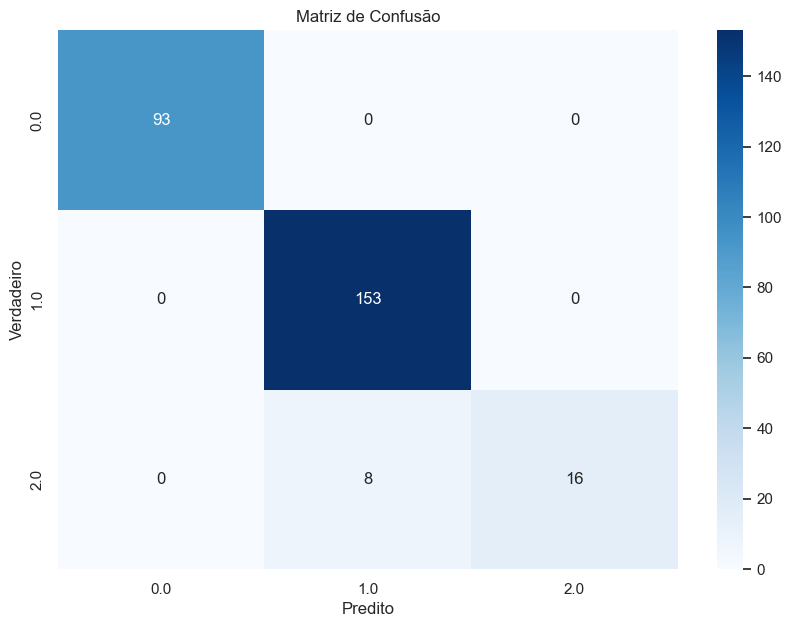

In [295]:
# Plotar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

In [296]:
print(X_test.head(30))

      IPV_2020  IPV_2021  IPV_2022 PREDITO REAL
289        8.1       8.8       7.7     SIM  SIM
811        7.6       0.0       0.0     NÃO  NÃO
809        0.0       8.3       0.0     NÃO  NÃO
817        0.0       0.0       7.0     SIM  SIM
1074       0.0       7.6       0.0     NÃO  NÃO
781        0.0       8.2       5.9     SIM  SIM
1149       0.0       7.5       6.0     SIM  SIM
881        0.0       0.0       8.6     NaN  NaN
1219       0.0       0.0       6.9     SIM  SIM
76         9.1       8.5       9.1     NaN  NaN
567        0.0       0.0       7.2     SIM  SIM
344        7.5       7.0       0.0     NÃO  NÃO
914        8.0       0.0       0.0     NÃO  NÃO
629        0.0       7.8       7.8     SIM  SIM
558        7.4       0.0       0.0     NÃO  NÃO
43         8.1       8.9       7.5     SIM  SIM
259        6.6       6.1       6.4     SIM  SIM
115        7.9       9.0       7.3     SIM  SIM
584        0.0       0.0       7.7     SIM  SIM
1248       0.0       8.0       7.9     S

In [297]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Usar StratifiedKFold para garantir a mesma proporção de classes em cada fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Avaliar múltiplas métricas
metricas = ['accuracy', 'precision', 'recall', 'f1']
resultados = {metrica: cross_val_score(svm_model, features, labels, cv=cv, scoring=metrica, n_jobs=-1, verbose=1) for metrica in metricas}

# Exibir os resultados
for metrica, scores in resultados.items():
    print(f"{metrica.capitalize()}: {scores.mean():.4f} (+/- {scores.std():.4f})")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.2s remaining:   13.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s


Accuracy: 0.9822 (+/- 0.0111)
Precision: nan (+/- nan)
Recall: nan (+/- nan)
F1: nan (+/- nan)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


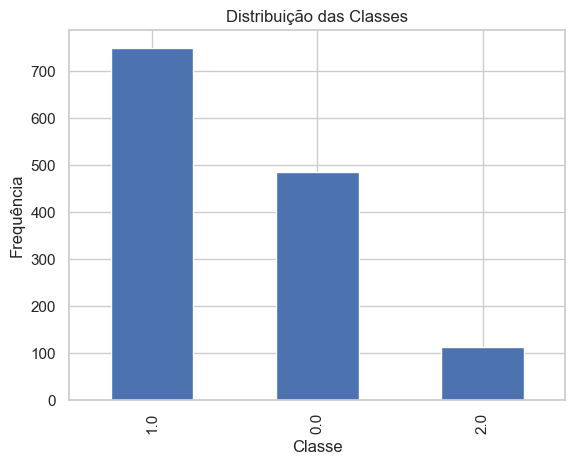

In [298]:

# Contar a frequência de cada classe
contagem_classes = df_selecionadas1["PONTO_VIRADA_2022_encoded"].value_counts()

# Visualizar a distribuição das classes
contagem_classes.plot(kind='bar')
plt.xlabel('Classe')
plt.ylabel('Frequência')
plt.title('Distribuição das Classes')
plt.show()

In [299]:
print(df_selecionadas1["PONTO_VIRADA_2022"].value_counts())
print(df_selecionadas1["PONTO_VIRADA_2021"].value_counts())
print(df_selecionadas1["PONTO_VIRADA_2020"].value_counts())

PONTO_VIRADA_2022
Não    749
0      486
Sim    113
Name: count, dtype: int64
PONTO_VIRADA_2021
0         662
Não       576
Sim       108
#NULO!      2
Name: count, dtype: int64
PONTO_VIRADA_2020
0      647
Não    607
Sim     94
Name: count, dtype: int64


#### Fazendo o Balanceamento das Classes 

In [300]:
df_modelo = df_selecionadas1.copy()
#Dropando as colunas encoded
df_modelo.drop(columns=["PONTO_VIRADA_2020_encoded", "PONTO_VIRADA_2021_encoded", "PONTO_VIRADA_2022_encoded"], inplace=True)

In [301]:
df_modelo.head()

,NOME,ANOS_PM_2020,FASE_2020,INDE_2020,PEDRA_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,...,IPV_2022,IAN_2022,NIVEL_IDEAL_2022,Média_INDE,INDE_2020Novo,INDE_2021Novo,INDE_2022Novo,PONTO_VIRADA_2020,PONTO_VIRADA_2021,PONTO_VIRADA_2022
0,ALUNO-75,1.0,3.0,9.6,Topázio,0.1,1.0,1.0,0.9,9.3,...,9.7,1.0,Fase 3 (7º e 8º ano),9.366667,3.46,6.94,7.38,Sim,Sim,Sim
1,ALUNO-1095,1.0,0.0,9.1,Topázio,0.1,1.0,7.5,1.0,7.5,...,8.0,1.0,Fase 1 (4º ano),9.066667,3.61,7.22,7.58,Não,Sim,Não
2,ALUNO-11,0.0,0.0,9.7,Topázio,9.0,1.0,8.1,1.0,1.0,...,9.5,5.0,Fase 2 (5º e 6º ano),9.000000,2.51,5.98,8.54,Sim,Sim,Sim
3,ALUNO-916,3.0,3.0,8.5,Topázio,7.9,8.7,7.5,0.7,8.5,...,9.6,1.0,Fase 5 (1º EM),8.866667,6.33,7.49,6.43,Sim,Sim,Sim
4,ALUNO-1130,1.0,2.0,8.7,Topázio,9.5,9.7,6.8,0.9,8.3,...,8.2,1.0,Fase 3 (7º e 8º ano),8.866667,6.24,6.10,7.87,Não,Sim,Não


In [302]:
df_modelo["PONTO_VIRADA_2022"].value_counts()

PONTO_VIRADA_2022
Não    749
0      486
Sim    113
Name: count, dtype: int64

In [303]:
df_modelo_limpo = df_modelo

In [304]:
# Remover valores nulos
df_modelo_limpo = df_modelo_limpo.dropna(subset=["PONTO_VIRADA_2022"])

In [305]:
# Removendo valores "0"
df_modelo_limpo = df_modelo_limpo[df_modelo_limpo["PONTO_VIRADA_2022"] != "0"]

In [306]:
df_modelo_limpo["PONTO_VIRADA_2022"].value_counts()

PONTO_VIRADA_2022
Não    749
Sim    113
Name: count, dtype: int64

In [307]:
df_modelo_limpo.head(5)

,NOME,ANOS_PM_2020,FASE_2020,INDE_2020,PEDRA_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,...,IPV_2022,IAN_2022,NIVEL_IDEAL_2022,Média_INDE,INDE_2020Novo,INDE_2021Novo,INDE_2022Novo,PONTO_VIRADA_2020,PONTO_VIRADA_2021,PONTO_VIRADA_2022
0,ALUNO-75,1.0,3.0,9.6,Topázio,0.1,1.0,1.0,0.9,9.3,...,9.7,1.0,Fase 3 (7º e 8º ano),9.366667,3.46,6.94,7.38,Sim,Sim,Sim
1,ALUNO-1095,1.0,0.0,9.1,Topázio,0.1,1.0,7.5,1.0,7.5,...,8.0,1.0,Fase 1 (4º ano),9.066667,3.61,7.22,7.58,Não,Sim,Não
2,ALUNO-11,0.0,0.0,9.7,Topázio,9.0,1.0,8.1,1.0,1.0,...,9.5,5.0,Fase 2 (5º e 6º ano),9.000000,2.51,5.98,8.54,Sim,Sim,Sim
3,ALUNO-916,3.0,3.0,8.5,Topázio,7.9,8.7,7.5,0.7,8.5,...,9.6,1.0,Fase 5 (1º EM),8.866667,6.33,7.49,6.43,Sim,Sim,Sim
4,ALUNO-1130,1.0,2.0,8.7,Topázio,9.5,9.7,6.8,0.9,8.3,...,8.2,1.0,Fase 3 (7º e 8º ano),8.866667,6.24,6.10,7.87,Não,Sim,Não


In [308]:
# convertendo os valores SIM e NÃO para 1 e 0	
df_modelo_limpo[["PONTO_VIRADA_2020_encoding"]] = df_modelo_limpo[["PONTO_VIRADA_2020"]].replace({"Sim": 1, "Não": 0}).astype(int)
df_modelo_limpo[["PONTO_VIRADA_2021_encoding"]] = df_modelo_limpo[["PONTO_VIRADA_2021"]].replace({"Sim": 1, "Não": 0}).astype(int)
df_modelo_limpo[["PONTO_VIRADA_2022_encoding"]] = df_modelo_limpo[["PONTO_VIRADA_2022"]].replace({"Sim": 1, "Não": 0}).astype(int)

In [309]:
df_modelo_limpo.head(5)

,NOME,ANOS_PM_2020,FASE_2020,INDE_2020,PEDRA_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,...,Média_INDE,INDE_2020Novo,INDE_2021Novo,INDE_2022Novo,PONTO_VIRADA_2020,PONTO_VIRADA_2021,PONTO_VIRADA_2022,PONTO_VIRADA_2020_encoding,PONTO_VIRADA_2021_encoding,PONTO_VIRADA_2022_encoding
0,ALUNO-75,1.0,3.0,9.6,Topázio,0.1,1.0,1.0,0.9,9.3,...,9.366667,3.46,6.94,7.38,Sim,Sim,Sim,1,1,1
1,ALUNO-1095,1.0,0.0,9.1,Topázio,0.1,1.0,7.5,1.0,7.5,...,9.066667,3.61,7.22,7.58,Não,Sim,Não,0,1,0
2,ALUNO-11,0.0,0.0,9.7,Topázio,9.0,1.0,8.1,1.0,1.0,...,9.000000,2.51,5.98,8.54,Sim,Sim,Sim,1,1,1
3,ALUNO-916,3.0,3.0,8.5,Topázio,7.9,8.7,7.5,0.7,8.5,...,8.866667,6.33,7.49,6.43,Sim,Sim,Sim,1,1,1
4,ALUNO-1130,1.0,2.0,8.7,Topázio,9.5,9.7,6.8,0.9,8.3,...,8.866667,6.24,6.10,7.87,Não,Sim,Não,0,1,0


In [310]:
df_modelo_limpo[['PONTO_VIRADA_2020_encoding', 'PONTO_VIRADA_2021_encoding', 'PONTO_VIRADA_2022_encoding']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 862 entries, 0 to 1347
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   PONTO_VIRADA_2020_encoding  862 non-null    int32
 1   PONTO_VIRADA_2021_encoding  862 non-null    int32
 2   PONTO_VIRADA_2022_encoding  862 non-null    int32
dtypes: int32(3)
memory usage: 16.8 KB


#### Aplicando técnicas para Balanceamento das Classes.

In [311]:
# Instalar a biblioteca imbalanced-learn
%pip install imbalanced-learn

# Importar as bibliotecas necessárias

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = df_modelo_limpo[['IPV_2020', 'IPV_2021', 'IPV_2022']]
y = df_modelo_limpo['PONTO_VIRADA_2022_encoding']


# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar a imputação de valores faltantes nos dados de treino
imputer = SimpleImputer(strategy='mean')  # ou 'median', 'most_frequent', etc.
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Aplicar o SMOTE para balancear as classes nos dados de treino
smote = SMOTE(random_state=42, sampling_strategy="minority")
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)

# Verificar o balanceamento das classes
print(y_train_resampled.value_counts())


# Passo 2: Contar a frequência de cada classe
contagem_classes = df_modelo_limpo["PONTO_VIRADA_2022_encoding"].value_counts()




PONTO_VIRADA_2022_encoding
0    598
1    598
Name: count, dtype: int64



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


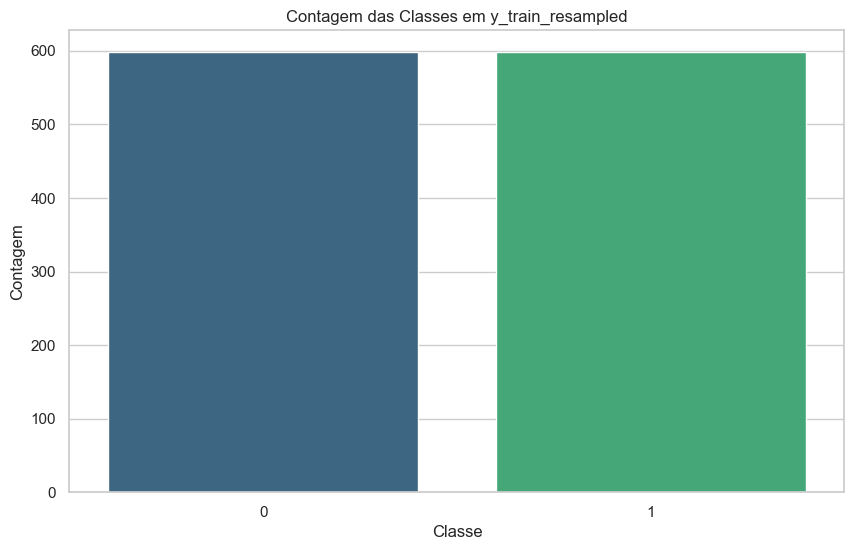

In [312]:
# Contagem das classes
class_counts = y_train_resampled.value_counts()

# Configurar o estilo do gráfico
sns.set(style="whitegrid")

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")

# Adicionar títulos e rótulos
plt.title('Contagem das Classes em y_train_resampled')
plt.xlabel('Classe')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

#### Modelo 2

Acurácia: 0.9653179190751445
              precision    recall  f1-score     support
0              0.986577  0.973510  0.980000  151.000000
1              0.833333  0.909091  0.869565   22.000000
accuracy       0.965318  0.965318  0.965318    0.965318
macro avg      0.909955  0.941300  0.924783  173.000000
weighted avg   0.967090  0.965318  0.965956  173.000000
     REAL PREDITO
1101  NÃO     NÃO
941   SIM     SIM
120   NÃO     NÃO
208   NÃO     NÃO
548   NÃO     NÃO
...   ...     ...
235   NÃO     NÃO
480   NÃO     NÃO
215   NÃO     NÃO
1230  NÃO     NÃO
7     SIM     SIM

[173 rows x 2 columns]


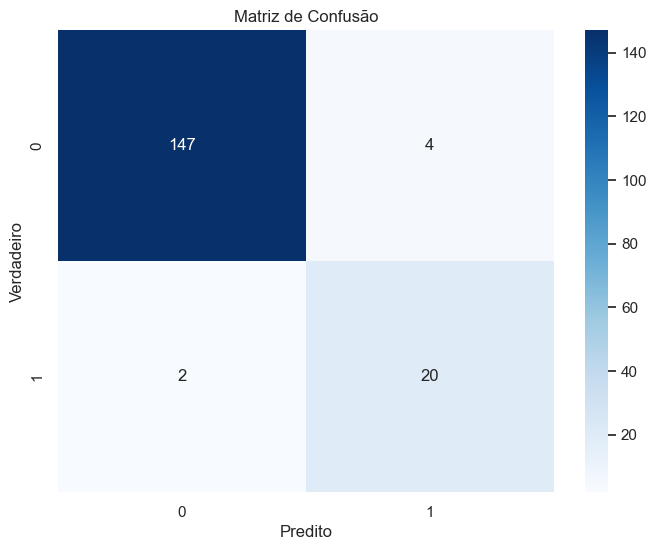

Tamanho de y_pred: 173
Previsões 'NÃO': 149
Previsões 'SIM': 24


In [313]:
# Importar as bibliotecas necessárias

from sklearn.impute import SimpleImputer
from sklearn.svm import SVC


# Inicializar o modelo SVM
svm_model = SVC(kernel='linear')  # pode escolher outros kernels como 'rbf', 'poly', etc.

# Treinar o modelo
svm_model.fit(X_train_resampled, y_train_resampled)

# Fazer previsões nos dados de teste
y_pred = svm_model.predict(X_test_imputed)

# Criar uma cópia do DataFrame de teste para evitar o SettingWithCopyWarning
X_test_copy = X_test.copy()

# Adicionar as predições ao DataFrame de teste
X_test_copy['PREDITO'] = y_pred

# Adicionar os valores reais ao DataFrame de teste
X_test_copy['REAL'] = y_test.values

# Mapear os valores preditos e reais de 1 para "NÃO" e 2 para "SIM"
mapping = {1: "SIM", 0: "NÃO"}
X_test_copy['PREDITO'] = X_test_copy['PREDITO'].map(mapping)
X_test_copy['REAL'] = X_test_copy['REAL'].map(mapping)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Acurácia: {accuracy}')
report_df_modelo_limpo = pd.DataFrame(report).transpose()  # Converter para DataFrame
print(report_df_modelo_limpo)

# Exibir os valores reais e previstos
print(X_test_copy[['REAL', 'PREDITO']])

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()


# Contar a quantidade de "SIM" e "NÃO" nas previsões
contagem_previsoes = X_test_copy['PREDITO'].value_counts()
print(f'Tamanho de y_pred: {len(y_pred)}')
print(f"Previsões 'NÃO': {contagem_previsoes['NÃO']}")
print(f"Previsões 'SIM': {contagem_previsoes['SIM']}")

In [314]:
report_df_modelo_limpo = pd.DataFrame(report).transpose()  # Converter para DataFrame
print(report_df_modelo_limpo)

              precision    recall  f1-score     support
0              0.986577  0.973510  0.980000  151.000000
1              0.833333  0.909091  0.869565   22.000000
accuracy       0.965318  0.965318  0.965318    0.965318
macro avg      0.909955  0.941300  0.924783  173.000000
weighted avg   0.967090  0.965318  0.965956  173.000000


Acurácia: 0.861271676300578
              precision    recall  f1-score     support
0              0.984733  0.854305  0.914894  151.000000
1              0.476190  0.909091  0.625000   22.000000
accuracy       0.861272  0.861272  0.861272    0.861272
macro avg      0.730462  0.881698  0.769947  173.000000
weighted avg   0.920063  0.861272  0.878029  173.000000
     REAL PREDITO
1101  NÃO     NÃO
941   SIM     SIM
120   NÃO     NÃO
208   NÃO     NÃO
548   NÃO     NÃO
...   ...     ...
235   NÃO     NÃO
480   NÃO     NÃO
215   NÃO     NÃO
1230  NÃO     NÃO
7     SIM     SIM

[173 rows x 2 columns]


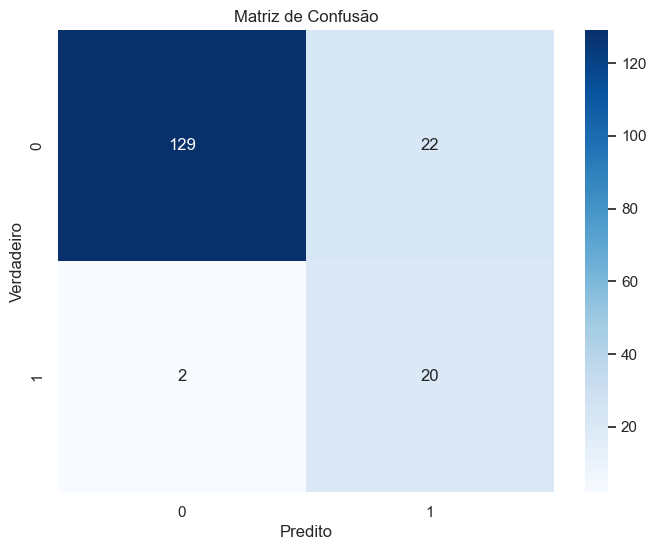

Tamanho de y_pred: 173
Previsões 'SIM': 42
Previsões 'NÃO': 131


In [315]:
from sklearn.naive_bayes import GaussianNB  # Importe o modelo Naive Bayes


# ... (seu código para carregar os dados e preparar as features e labels)

# Tratar dados nulos e zeros
features2 = df_modelo_limpo[['IPV_2020', 'IPV_2021', 'IPV_2022']].fillna(0)
labels2 = df_modelo_limpo["PONTO_VIRADA_2022_encoding"]


# Inicializar o imputer para substituir valores NaN pela média
imputer = SimpleImputer(strategy='mean')

# Aplicar o imputer aos dados de treino e teste
X_train_imputed = imputer.fit_transform(X_train_resampled)
X_test_imputed = imputer.transform(X_test)

# Inicializar o modelo Naive Bayes
nb_model = GaussianNB()  # Use GaussianNB para features contínuas

# Treinar o modelo
nb_model.fit(X_train_imputed, y_train_resampled)

# Fazer previsões nos dados de teste
y_pred = nb_model.predict(X_test_imputed)

# Criar uma cópia do DataFrame de teste para evitar o SettingWithCopyWarning
X_test_copy = X_test.copy()

# Adicionar as predições ao DataFrame de teste
X_test_copy['PREDITO'] = y_pred

# Adicionar os valores reais ao DataFrame de teste
X_test_copy['REAL'] = y_test.values

# Mapear os valores preditos e reais de 1 para "SIM" e 0 para "NÃO"
mapping = {1: "SIM", 0: "NÃO"}
X_test_copy['PREDITO'] = X_test_copy['PREDITO'].map(mapping)
X_test_copy['REAL'] = X_test_copy['REAL'].map(mapping)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Acurácia: {accuracy}')
report_df_modelo_limpo = pd.DataFrame(report).transpose()  # Converter para DataFrame
print(report_df_modelo_limpo)

# Exibir os valores reais e previstos
print(X_test_copy[['REAL', 'PREDITO']])

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

# Contar a quantidade de "SIM" e "NÃO" nas previsões
contagem_previsoes = X_test_copy['PREDITO'].value_counts()
print(f'Tamanho de y_pred: {len(y_pred)}')
print(f"Previsões 'SIM': {contagem_previsoes['SIM']}")
print(f"Previsões 'NÃO': {contagem_previsoes['NÃO']}")

#### Arvore de Decisão

Acurácia: 0.9826589595375722
              precision    recall  f1-score     support
0              0.986842  0.993377  0.990099  151.000000
1              0.952381  0.909091  0.930233   22.000000
accuracy       0.982659  0.982659  0.982659    0.982659
macro avg      0.969612  0.951234  0.960166  173.000000
weighted avg   0.982460  0.982659  0.982486  173.000000
     REAL PREDITO
1101  NÃO     NÃO
941   SIM     SIM
120   NÃO     NÃO
208   NÃO     NÃO
548   NÃO     NÃO
...   ...     ...
235   NÃO     NÃO
480   NÃO     NÃO
215   NÃO     NÃO
1230  NÃO     NÃO
7     SIM     SIM

[173 rows x 2 columns]


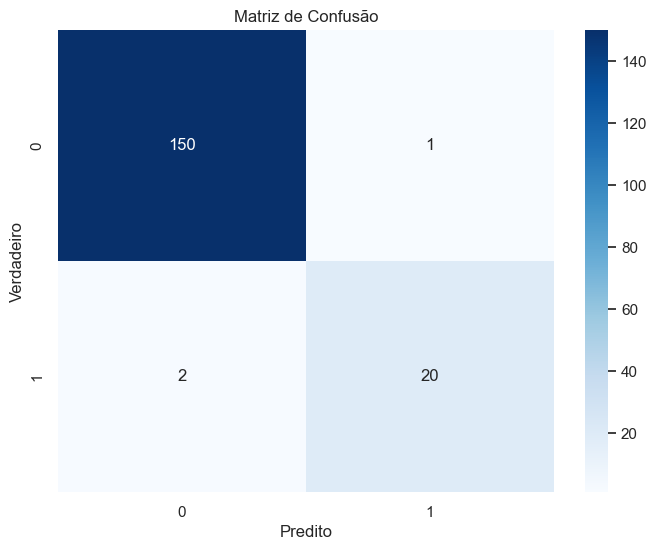

In [317]:
from sklearn.tree import DecisionTreeClassifier


# Tratar dados nulos e zeros
features3 = df_modelo_limpo[['IPV_2020', 'IPV_2021', 'IPV_2022']].fillna(0)
labels3 = df_modelo_limpo["PONTO_VIRADA_2022_encoding"]


# Inicializar o imputer para substituir valores NaN pela média
imputer = SimpleImputer(strategy='mean')

# Aplicar o imputer aos dados de treino e teste
X_train_imputed = imputer.fit_transform(X_train_resampled)
X_test_imputed = imputer.transform(X_test)

# Inicializar o modelo de Árvore de Decisão
dt_model = DecisionTreeClassifier(random_state=42)  # pode ajustar parâmetros como 'max_depth', 'min_samples_split', etc.

# Treinar o modelo
dt_model.fit(X_train_imputed, y_train_resampled)

# Fazer previsões nos dados de teste
y_pred = dt_model.predict(X_test_imputed)

# Criar uma cópia do DataFrame de teste para evitar o SettingWithCopyWarning
X_test_copy = X_test.copy()

# Adicionar as predições ao DataFrame de teste
X_test_copy['PREDITO'] = y_pred

# Adicionar os valores reais ao DataFrame de teste
X_test_copy['REAL'] = y_test.values

# Mapear os valores preditos e reais de 1 para "SIM" e 0 para "NÃO"
mapping = {1: "SIM", 0: "NÃO"}
X_test_copy['PREDITO'] = X_test_copy['PREDITO'].map(mapping)
X_test_copy['REAL'] = X_test_copy['REAL'].map(mapping)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Acurácia: {accuracy}')
report_df_modelo_limpo = pd.DataFrame(report).transpose()  # Converter para DataFrame
print(report_df_modelo_limpo)

# Exibir os valores reais e previstos
print(X_test_copy[['REAL', 'PREDITO']])

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()



In [329]:

# Verificar se X_test e y_test são DataFrames ou Series
if isinstance(X_test, (pd.DataFrame, pd.Series)) and isinstance(y_test, (pd.DataFrame, pd.Series)):
    # Concatenar X_test e y_test ao longo do eixo das colunas
    resultado = pd.concat([X_test, y_test], axis=1)
    resultado['PONTO_VIRADA_2022_encoding'] = resultado['PONTO_VIRADA_2022_encoding'].map({1: "SIM", 0: "NÃO"})
    print(pd.DataFrame(resultado))

else:
    print("X_test e y_test devem ser DataFrame ou Series do pandas.")

      IPV_2020  IPV_2021  IPV_2022 PONTO_VIRADA_2022_encoding
1101       NaN       0.0       7.4                        NÃO
941        NaN       7.3       8.5                        SIM
120        7.8       7.9       7.3                        NÃO
208        7.9       8.7       6.4                        NÃO
548        NaN       6.8       7.2                        NÃO
...        ...       ...       ...                        ...
235        8.5       3.5       7.6                        NÃO
480        NaN       7.8       7.2                        NÃO
215        6.6       7.1       6.6                        NÃO
1230       NaN       0.0       4.7                        NÃO
7          8.8       9.4       9.2                        SIM

[173 rows x 4 columns]


In [330]:
resultado


,IPV_2020,IPV_2021,IPV_2022,PONTO_VIRADA_2022_encoding
1101,NaN,0.0,7.4,NÃO
941,NaN,7.3,8.5,SIM
120,7.8,7.9,7.3,NÃO
208,7.9,8.7,6.4,NÃO
548,NaN,6.8,7.2,NÃO
...,...,...,...,...
235,8.5,3.5,7.6,NÃO
480,NaN,7.8,7.2,NÃO
215,6.6,7.1,6.6,NÃO
1230,NaN,0.0,4.7,NÃO
